In [1]:
# %pip install -U scikit-learn
# %pip install xgboost
# %pip install statsmodels
# %pip install seaborn
# %pip install imbalanced-learn
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
#Common libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import random
import os
import re
import sys
import timeit
import string
from datetime import datetime

In [3]:
# sklearn  modules for data preprocessing
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [4]:
#sklearn modules for model selection
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [5]:
#sklearn modules for model evaluation and improvement
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score, fbeta_score, classification_report, roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score, GridSearchCV, ShuffleSplit, KFold

In [6]:
#sklearn modules for feature selection
from sklearn import model_selection

In [7]:
# from sklearn import metrics
from sklearn.metrics import classification_report, precision_recall_curve
from sklearn.metrics import auc, roc_auc_score, roc_curve
from sklearn.metrics import make_scorer, recall_score, log_loss
from sklearn.metrics import precision_recall_fscore_support

In [8]:
#Standard libraries for data visualization---------------------
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib
# import plotly.express as px
%matplotlib inline
color = sns.color_palette()
import matplotlib.ticker as mtick
from IPython.display import display
pd.options.display.max_columns = None
from pandas.plotting import scatter_matrix


In [9]:
#Libaries for Randomforest
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import RandomizedSearchCV, train_test_split

#libraries for Decission Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from scipy.stats import randint
from sklearn.metrics import classification_report
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [10]:
import warnings
warnings.filterwarnings('ignore')

In [11]:
df = pd.read_csv("water_potability.csv")
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [13]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


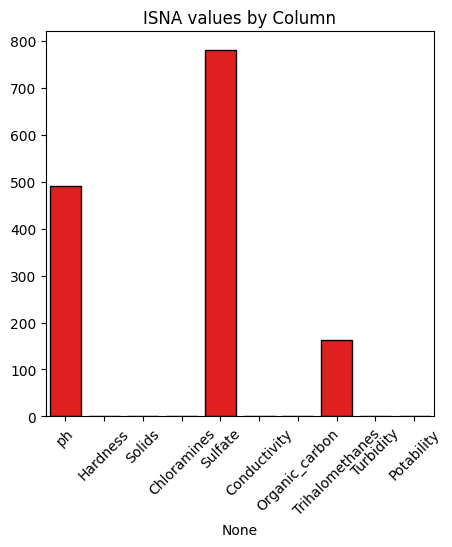

In [14]:
#check ISNA sum
isna_sum = df.isna().sum()
plt.figure(figsize=(5,5))
sns.barplot(x=isna_sum.index, y=isna_sum.values, color="red", edgecolor="black")
plt.title("ISNA values by Column")
plt.xticks(rotation=45)
plt.show()

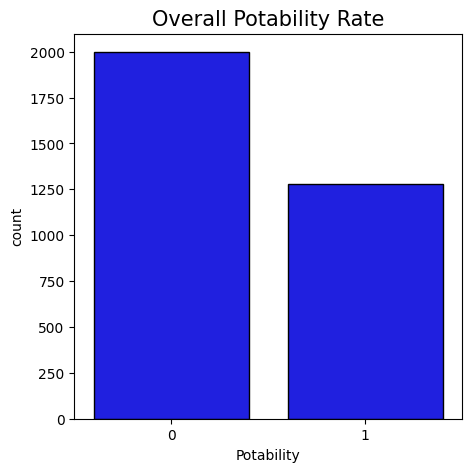

In [15]:
#Check target feature
plt.figure(figsize=(5,5))
plt.title("Overall Potability Rate", fontsize=15)
sns.countplot(data=df, x=df["Potability"], color="blue", edgecolor="black")
plt.show()

Exploratory Data Analysis

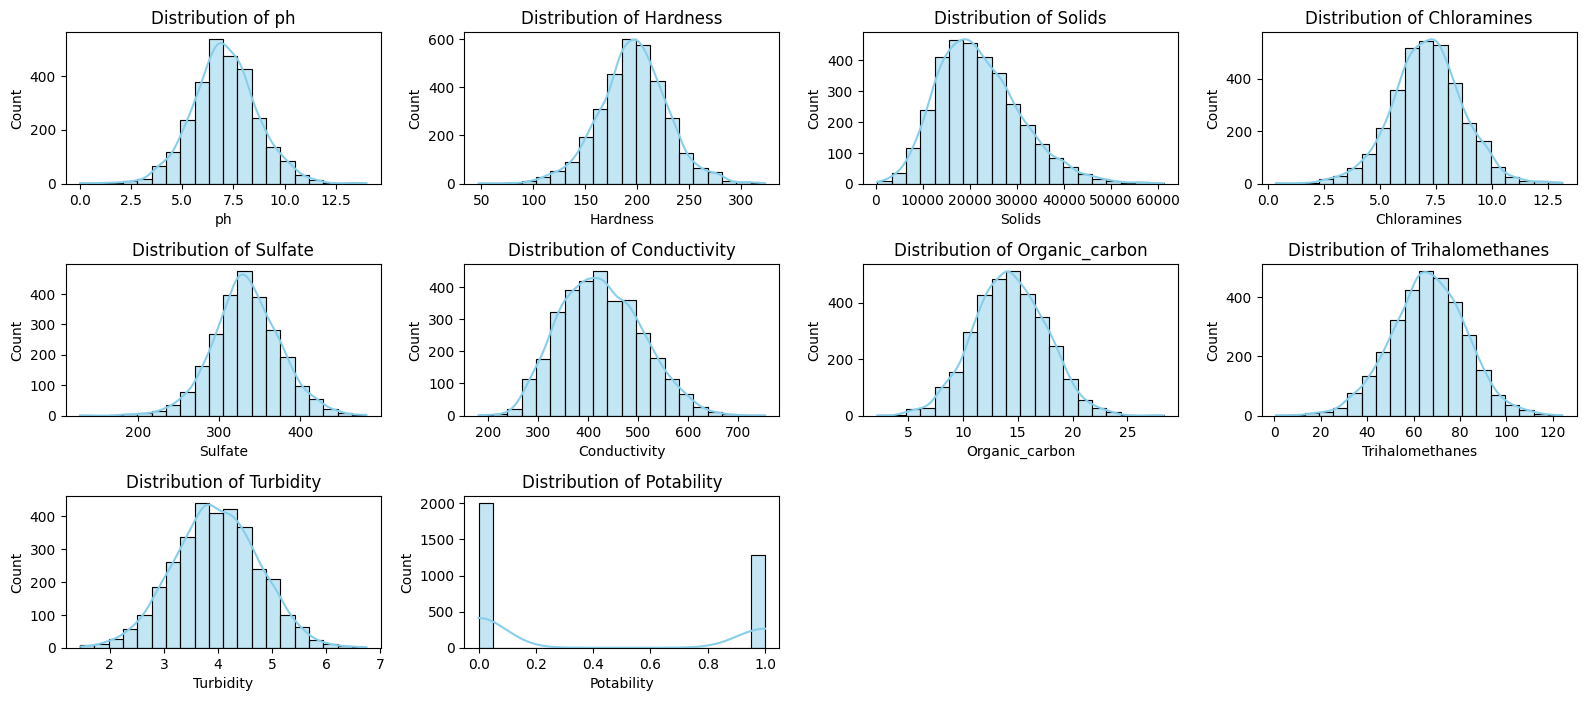

In [16]:
# Check distribution of each feature with Hist Plot

plt.figure(figsize=(16, 9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop through each column in the dataset
o = 1
for i, col in enumerate(df.columns):
    plt.subplot(4,4,o)
    sns.histplot(data=df, x=col, kde=True, color="skyblue", edgecolor="black", bins=20)
    plt.title(f"Distribution of {col}")
    o += 1

plt.tight_layout()
plt.show()

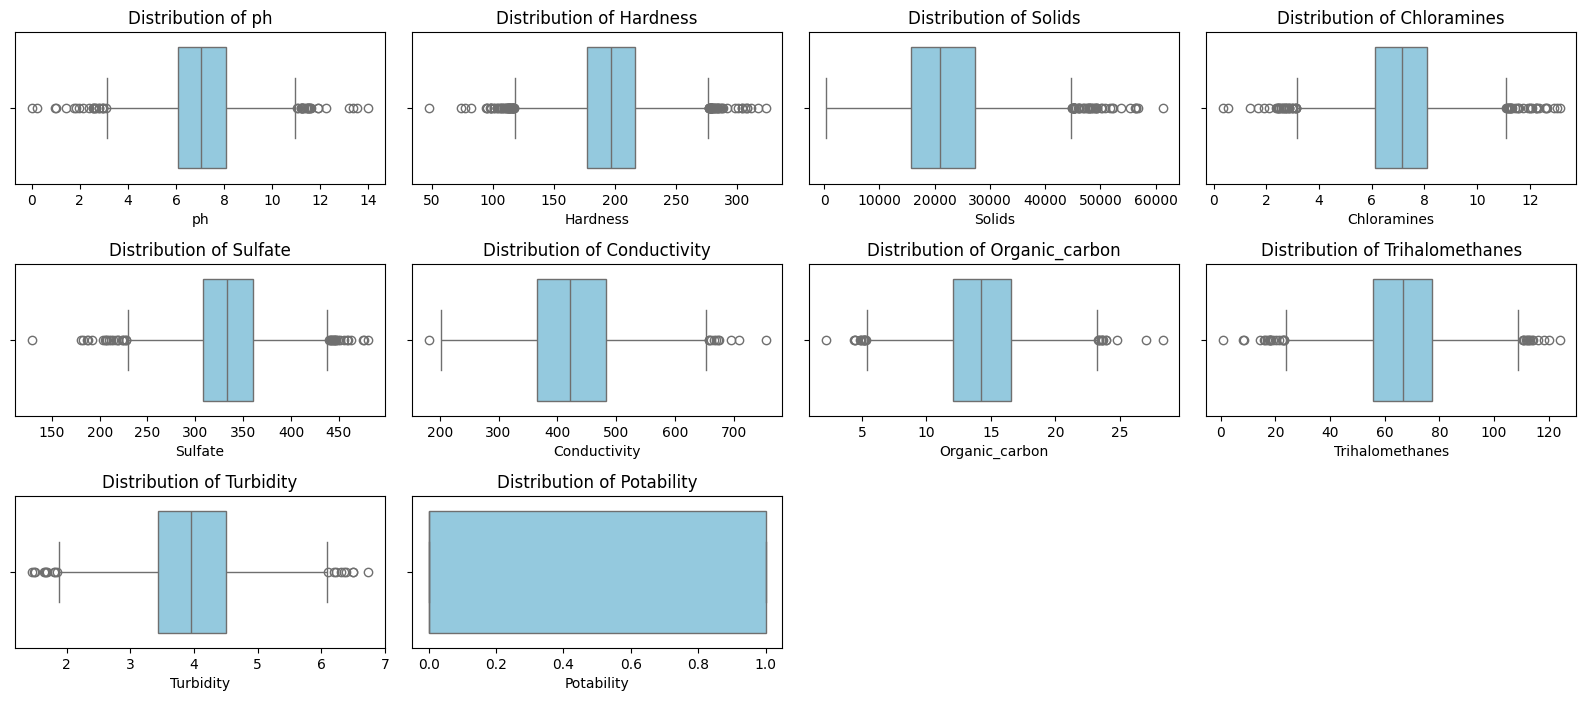

In [17]:
#Check distribution of each feature with box plot

plt.figure(figsize=(16,9))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

#loop through each feature
o = 1
for i, col in enumerate(df.columns):
    plt.subplot(4,4,o)
    sns.boxplot(data=df, x=col, color="skyblue")
    plt.title(f"Distribution of {col}")
    o += 1

plt.tight_layout()
plt.show()

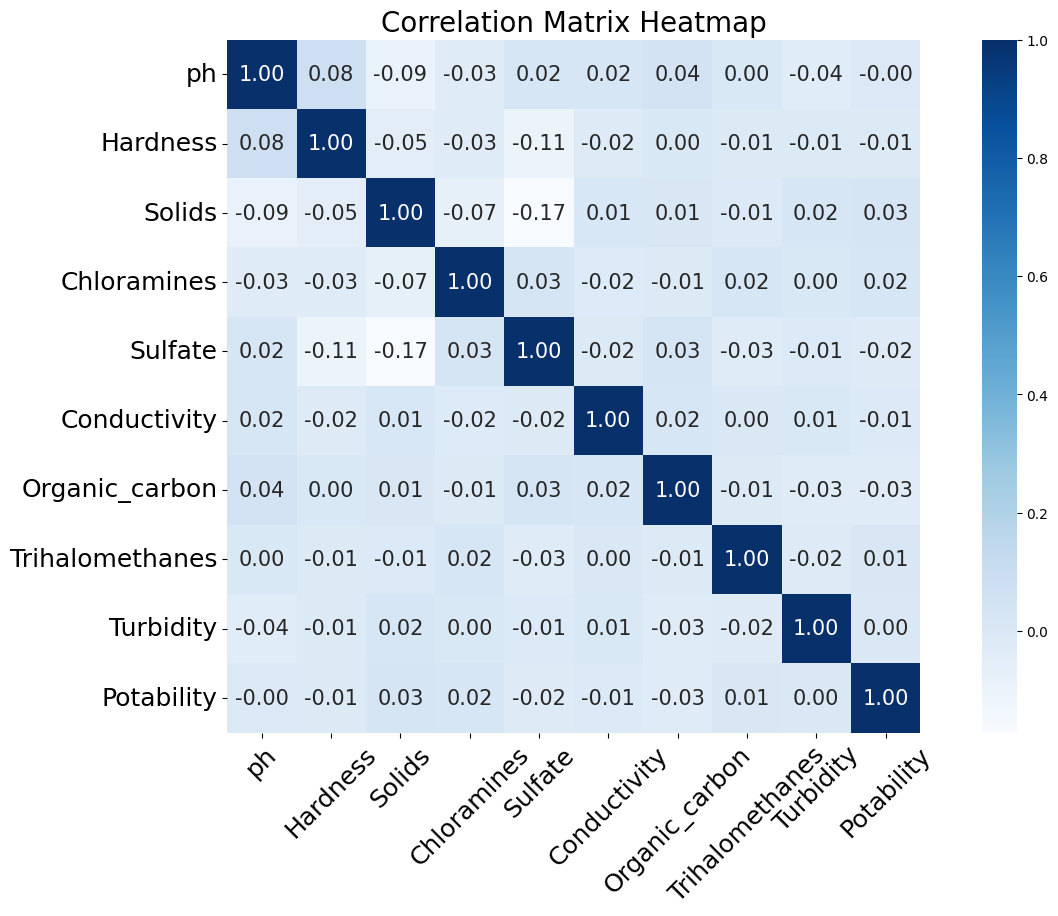

In [18]:
#Check correlation of each features
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), cbar=True, square=True, fmt=".2f", annot=True, annot_kws={"size": 15}, cmap="Blues")
plt.title("Correlation Matrix Heatmap", fontdict={"size": 20})
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18)
plt.show()

Feature engineering

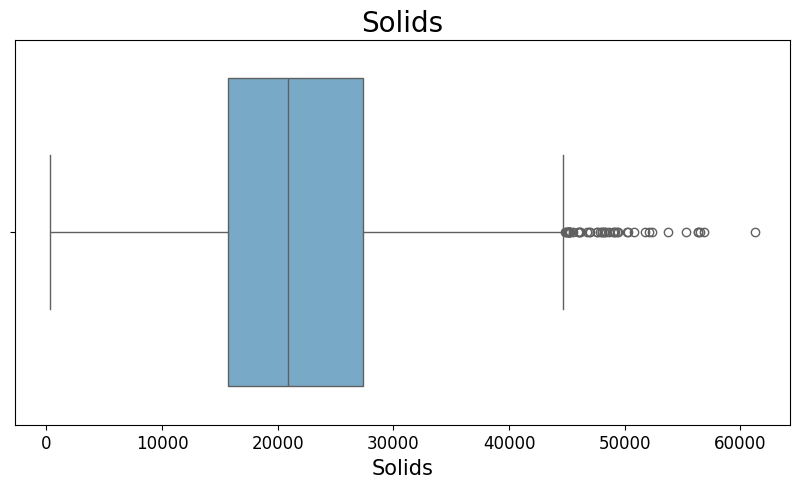

In [19]:
# Based on the histplot, we can conclude that Solids feature needs to be engineered to be normally distributed
plt.figure(figsize=(10,5))

sns.boxplot(data=df, x="Solids", palette="Blues")
plt.title("Solids", fontdict={"size": 20})
plt.xticks(fontsize=12)
plt.xlabel("Solids", fontsize=15)
plt.show()

In [20]:
# Outliers cleaning function

def outlier_analysis_df(df, col):
    outlier_dict = {}

    # Selected column
    column_data = df[col]

    sorted_data = sorted(column_data)

    # Calculate Q1 and Q3
    q1 = np.percentile(sorted_data, 25)
    q3 = np.percentile(sorted_data, 75)

    # IQR (Interquartile Range)
    iqr = q3 - q1

    # Lower and Upper outlier sınırlarını hesapla
    alt_sinir = q1 - 1.5 * iqr
    ust_sinir = q3 + 1.5 * iqr

    # Find Outliers
    outliers = [x for x in sorted_data if x < alt_sinir or x > ust_sinir]


    df_copy = df.copy()
    df_copy[col] = np.where((df_copy[col] < alt_sinir) | (df_copy[col] > ust_sinir), (q1 + q3) / 2, df_copy[col])

    outlier_dict[col] = outliers

    return df_copy, outlier_dict

In [21]:
df_without_outliers, outliers_dict = outlier_analysis_df(df, 'Solids')

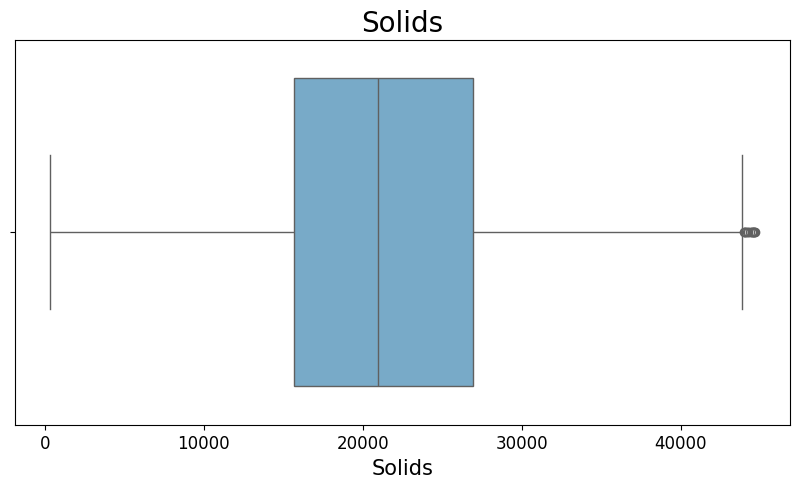

In [22]:
# Based on the histplot, we can conclude that Solids feature needs to be engineered to be normally distributed
plt.figure(figsize=(10,5))
sns.boxplot(data=df_without_outliers,x='Solids',palette="Blues")
plt.title('Solids',fontdict={'size': 20})
plt.xticks(fontsize=12)
plt.xlabel('Solids', fontsize=15)
plt.show()

In [23]:
# Change df_without_outliers back to df
df = df_without_outliers

In [24]:
df.isna().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

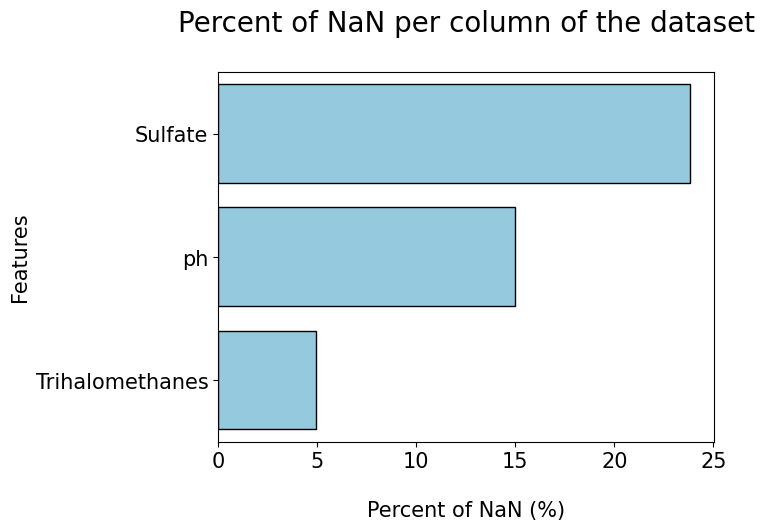

In [25]:
# Check the NaN of the train set by ploting percent of missing values per column
column_with_nan = df.columns[df.isnull().any()]
column_name = []
percent_nan = []

for i in column_with_nan:
    column_name.append(i)
    percent_nan.append(round(df[i].isnull().sum()*100/len(df), 2))

tab = pd.DataFrame(column_name, columns=["Column"])
tab["Percent_NaN"] = percent_nan
tab.sort_values(by=["Percent_NaN"], ascending=False, inplace=True)

#Define figure parameters
p = sns.barplot(
    x="Percent_NaN",
    y="Column",
    data=tab,
    edgecolor="black",
    color="skyblue"
)

p.set_title("Percent of NaN per column of the dataset\n", fontsize=20)
p.set_xlabel("\nPercent of NaN (%)", fontsize=15)
p.set_ylabel("Features", fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

In [26]:
# List NaN Columns
nan_columns = df.columns[df.isna().any()]
nan_columns

Index(['ph', 'Sulfate', 'Trihalomethanes'], dtype='object')

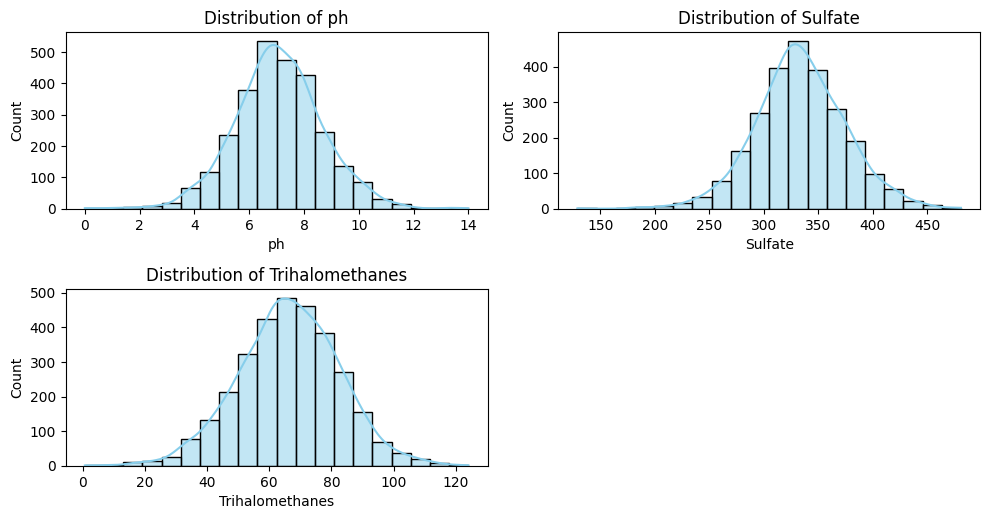

In [27]:
# Check distribution of each NaN feature

plt.figure(figsize=(10, 10))
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Loop through each column in the dataset
o = 1
for i, col in enumerate(nan_columns):
    plt.subplot(4, 2, o)
    sns.histplot(data=df, x=col, kde=True, color='skyblue', edgecolor='black', bins=20)
    plt.title(f'Distribution of {col}')
    o += 1

# Display the plots
plt.tight_layout()
plt.show()

Fill NaN values with SimpleImuter

In [28]:
# Imputation of missing values (NaNs) with SimpleImputer with Mean Strategy
imp = SimpleImputer(strategy="mean")
df_imputed = pd.DataFrame(imp.fit_transform(df))
df_imputed.head()

,0,1,2,3,4,5,6,7,8,9
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0.0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0.0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0.0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0.0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0.0


In [29]:
df_imputed.columns = df.columns
df_imputed.isna().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

<Figure size 1600x900 with 0 Axes>

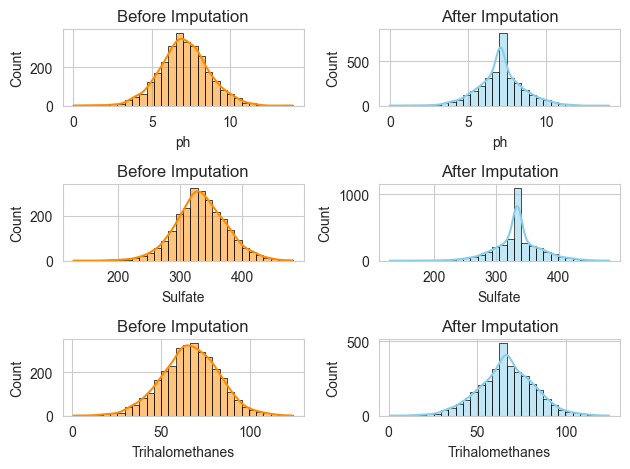

In [30]:
# Let's check the distribution of each imputed feature before and after imputation

# Define figure parameters
plt.figure(figsize=(16,9))
sns.set_style("whitegrid")
fig, axes = plt.subplots(3,2)

#plot the results
for feature, fig_pos in zip(column_with_nan, [0, 1, 2]):

    #before imputation
    p = sns.histplot(ax=axes[fig_pos, 0], x=df[feature], kde=True, bins=30, color="darkorange", edgecolor="black")
    axes[fig_pos, 0].set_title("Before Imputation")

    q = sns.histplot(ax=axes[fig_pos, 1], x=df_imputed[feature], kde=True, bins=30, color="skyblue", edgecolor="black")
    axes[fig_pos, 1].set_title("After Imputation")


plt.subplots_adjust(hspace=0.7)
plt.tight_layout()
plt.show()

Handling Data

In [31]:
# Split dataset into dependent and independent variables

#identify predictor and response variable:
response = df_imputed["Potability"]
predictor = df_imputed.drop(columns=["Potability"])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    predictor, response, stratify=response, test_size=0.2, random_state=0)

print(" X_train dataset: ", X_train.shape)
print(" y_train dataset: ", y_train.shape)
print(" X_test dataset: ", X_test.shape)
print(" y_test dataset: ", y_test.shape)

 X_train dataset:  (2620, 9)
 y_train dataset:  (2620,)
 X_test dataset:  (656, 9)
 y_test dataset:  (656,)


Handling imbalance with SMOTE

In [33]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=0)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_resampled.shape))
print('After OverSampling, the shape of train_y: {}\n'.format(y_train_resampled.shape))

print("After OverSampling, counts of label '1' y_train_resampled: {}".format(sum(y_train_resampled==1)))
print("After OverSampling, counts of label '0' y_train_resampled: {} \n".format(sum(y_train_resampled==0)))

print("After OverSampling, counts of label '1' y_test: {}".format(sum(y_test==1)))
print("After OverSampling, counts of label '0' y_test: {}".format(sum(y_test==0)))

Before OverSampling, counts of label '1': 1022
Before OverSampling, counts of label '0': 1598 

After OverSampling, the shape of train_X: (3196, 9)
After OverSampling, the shape of train_y: (3196,)

After OverSampling, counts of label '1' y_train_resampled: 1598
After OverSampling, counts of label '0' y_train_resampled: 1598 

After OverSampling, counts of label '1' y_test: 256
After OverSampling, counts of label '0' y_test: 400


Feature Scaling

In [34]:
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

Without SMOTE

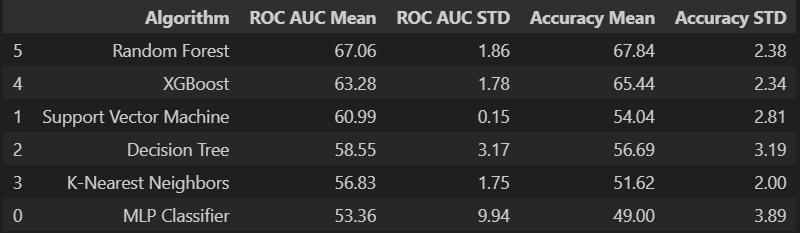

In [35]:
scaler = StandardScaler()
X_train_resampled2 = pd.DataFrame(scaler.fit_transform(X_train_resampled))
X_train_resampled2.columns = X_train_resampled.columns.values
X_train_resampled2.index = X_train_resampled.index.values

X_train_resampled = X_train_resampled2

X_test2 = pd.DataFrame(scaler.transform(X_test))
X_test2.columns = X_test.columns.values
X_test2.index = X_test.index.values
X_test = X_test2

Modelling

In [36]:
models = [
    # (
    #     "MLP Classifier", 
    #     MLPClassifier(
    #         hidden_layer_sizes=(50),
    #         max_iter=1000,
    #         random_state=0
    #     )
    # ),
    # (
    #     "Support Vector Machine",
    #     SVC(
    #         probability=True,
    #         random_state=0
    #     )
    # ),
    # (
    #     "Decision Tree",
    #     DecisionTreeClassifier(
    #         criterion="entropy",
    #         random_state=0
    #     )
    # ),
    # (
    #     "K-Nearest Neighbors",
    #     KNeighborsClassifier(n_neighbors=5)
    # ),
    # (
    #     "XGBoost",
    #     XGBClassifier(random_state=0)
    # ),
    # (
    #     "Random Forest",
    #     RandomForestClassifier(
    #         criterion="entropy",
    #         random_state=0,
    #         n_estimators=100
    #     )
    # ),
    (
        "Gaussian Naive Bayes",
        GaussianNB()
    )
]

In [37]:
#Model evaluation
acc_results = []
auc_results = []
names = []

col = ["Algorithm", "ROC AUC Mean", "ROC AUC STD", "Accuracy Mean", "Accuracy STD"]

model_results = pd.DataFrame(columns=col)

i = 0
for name, model in models:

    kfold = model_selection.StratifiedKFold(n_splits=10) # 10-fold cross-validation
    
    cv_acc_results = model_selection.cross_val_score(
        model, X_train_resampled, y_train_resampled, cv=kfold, scoring="accuracy"
    )

    cv_auc_results = model_selection.cross_val_score(
        model, X_train_resampled, y_train_resampled, cv=kfold, scoring="roc_auc"
    )

    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)

    names.append(name)
    model_results.loc[i] = [
        name,
        round(cv_auc_results.mean()*100, 2),
        round(cv_auc_results.std()*100, 2),
        round(cv_acc_results.mean()*100, 2),
        round(cv_acc_results.std()*100, 2)
    ]

    i += 1


model_results.sort_values(by=["ROC AUC Mean"], ascending=False)



,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
0,Gaussian Naive Bayes,59.95,4.15,56.14,3.99


Try out Individual Models

In [38]:
#Save model results in lists
model_list = []
accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

Gaussian Naive Bayes

In [39]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

gnb.fit(X_train_resampled, y_train_resampled)

y_pred = gnb.predict(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


model_results = pd.DataFrame([["Gaussian Naive Bayes", acc, prec, rec, f1]], columns=["Model", "Accuracy", "Precision", "Recall", "F1 score"])

results = model_results.sort_values(by=["Precision", "Recall"], ascending=False)
print(results)


                  Model  Accuracy  Precision    Recall  F1 score
0  Gaussian Naive Bayes  0.525915   0.411003  0.496094  0.449558


In [40]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

params_dist = {
    'var_smoothing': np.logspace(0, -9, num=100)
}

grid_search_nb = GridSearchCV(gnb, params_dist, cv=cv, verbose=1, scoring="roc_auc", n_jobs=1)


grid_search_nb.fit(X_train_resampled, y_train_resampled)

best_gnb = grid_search_nb.best_estimator_

y_pred = best_gnb.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

#Save model performance to model_list
model_list.append(best_gnb.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)

model_results = []
model_results = pd.DataFrame([['GNB', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_mlp = pd.concat([model_results, model_results], ignore_index=True)
model_results
print(classification_report(y_test, y_pred))


Fitting 30 folds for each of 100 candidates, totalling 3000 fits
              precision    recall  f1-score   support

         0.0       0.63      0.55      0.58       400
         1.0       0.41      0.50      0.45       256

    accuracy                           0.53       656
   macro avg       0.52      0.52      0.52       656
weighted avg       0.54      0.53      0.53       656



Multi-Layer Perceptron

In [41]:
# MLP 
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=0)


# Model Training
mlp.fit(X_train_resampled, y_train_resampled)

#predicting the test set results
y_pred = mlp.predict(X_test)

#Evaluate results

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


model_results = pd.DataFrame([["MLP", acc, prec, rec, f1]], columns=["Model", "Accuracy", "Precision", "Recall", "F1 score"])

results = model_results.sort_values(by=["Precision", "Recall"], ascending=False)
print(results)






  Model  Accuracy  Precision   Recall  F1 score
0   MLP  0.606707    0.49635  0.53125  0.513208


In [42]:
# Inisialization MLP
mlp = MLPClassifier(hidden_layer_sizes=(50), max_iter=1000, random_state=0)

# Model training
mlp.fit(X_train_resampled, y_train_resampled)

# Predicting the Test set results
y_pred = mlp.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )
test_scores = precision_recall_fscore_support(y_test, y_pred)
print(test_scores)
model_results = pd.DataFrame([['MLP', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
model_results
# results = model_results.sort_values(["Precision", "Recall"], ascending = False)
# print (results)

(array([0.68586387, 0.49635036]), array([0.655  , 0.53125]), array([0.67007673, 0.51320755]), array([400, 256], dtype=int64))


,Model,Accuracy,Precision,Recall,F1 Score
0,MLP,0.606707,0.49635,0.53125,0.513208


In [43]:
# Parameters to be tuned
param_grid = {
    'hidden_layer_sizes': [(50,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

mlp2 = MLPClassifier(max_iter=1000)

# Create Grid Search
grid_search = GridSearchCV(mlp, param_grid, n_jobs=-1, cv=5, verbose=2)
grid_search.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", grid_search.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters found:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'solver': 'adam'}


In [44]:
#save best parameter as best_mlp
best_mlp = grid_search.best_estimator_

# Predicting the test set results using best parameter
y_pred = best_mlp.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

#Save model performance to model_list
model_list.append(best_mlp.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)

model_results = []
model_results = pd.DataFrame([['MLP', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_mlp = pd.concat([model_results, model_results], ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,MLP,0.612805,0.503788,0.519531,0.511538


In [45]:
# Inisialization MLP
clf_svc = SVC(probability=True, random_state=0)

# Model training
clf_svc.fit(X_train_resampled, y_train_resampled)

# Predicting the Test set results
y_pred = clf_svc.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

model_results = pd.DataFrame([['MLP', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = model_results.sort_values(["Precision", "Recall"], ascending = False)
print (results)

  Model  Accuracy  Precision   Recall  F1 Score
0   MLP   0.61128   0.501845  0.53125  0.516129


In [46]:
# Inisialization SVM
clf_svc = SVC(probability=True, random_state=0)

# Model training
clf_svc.fit(X_train_resampled, y_train_resampled)

# Predicting the Test set results
y_pred = clf_svc.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

model_results = pd.DataFrame([['MLP', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results = model_results.sort_values(["Precision", "Recall"], ascending = False)
print (results)

  Model  Accuracy  Precision   Recall  F1 Score
0   MLP   0.61128   0.501845  0.53125  0.516129


In [47]:
# Parameters to be tuned
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'degree': [2, 3, 4],  # Relevant only for 'poly' kernel
}

svc1 = SVC()

# Create Grid Search
grid_search1 = GridSearchCV(svc1, param_grid, n_jobs=-1, cv=5, verbose=2)
grid_search1.fit(X_train_resampled, y_train_resampled)
print("Best parameters found: ", grid_search1.best_params_)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best parameters found:  {'C': 10, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}


In [48]:
#save best parameter as best_mlp
best_svc = grid_search1.best_estimator_

# Predicting the test set results using best parameter
y_pred = best_svc.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

#Save model performance to model_list
model_list.append(best_svc.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)

model_results = pd.DataFrame([['SVC', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_svc = pd.concat([model_results, model_results], ignore_index=True)
model_results

,Model,Accuracy,Precision,Recall,F1 Score
0,SVC,0.625,0.517606,0.574219,0.544444


In [49]:
#Random Forest
# Fitting Random Forest to the Training set:

classifier = RandomForestClassifier(n_estimators=22, criterion='entropy', random_state=0)
classifier.fit(X_train_resampled, y_train_resampled)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['Random Forest', acc, prec, rec, f1]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

results_RF = pd.concat([model_results, model_results], ignore_index=True)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.67      0.70      0.69       400
         1.0       0.50      0.47      0.49       256

    accuracy                           0.61       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.61      0.61       656



In [50]:
# Tunning
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, RepeatedStratifiedKFold
from scipy.stats import randint
from sklearn.metrics import classification_report

# Create a Random Forest model
RF_model = RandomForestClassifier()

# Define hyperparameter search space for Random Forest
RF_param_dist = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
    "criterion": ["gini", "entropy"]
}

# Create cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform hyperparameter tuning with RandomizedSearchCV for Random Forest
RF = RandomizedSearchCV(RF_model, RF_param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)
RF.fit(X_train_resampled, y_train_resampled)

# Get the best estimator from RandomizedSearchCV for Random Forest
best_RF = RF.best_estimator_

In [51]:
# Train the best Random Forest model on the training data
best_RF.fit(X_train_resampled, y_train_resampled)

# Predict on the test data for Random Forest
pred_RF = best_RF.predict(X_test)
pred_prob_RF = best_RF.predict_proba(X_test)

# Evaluate results
acc = accuracy_score(y_test, pred_RF)
prec = precision_score(y_test, pred_RF)
rec = recall_score(y_test, pred_RF)
f1 = f1_score(y_test, pred_RF)

#Save model performance to model_list
model_list.append(best_RF.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)

# Display classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, pred_RF))

Classification Report for Random Forest:
              precision    recall  f1-score   support

         0.0       0.70      0.72      0.71       400
         1.0       0.54      0.51      0.53       256

    accuracy                           0.64       656
   macro avg       0.62      0.62      0.62       656
weighted avg       0.64      0.64      0.64       656



In [52]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train_resampled, y_train_resampled)

y_pred = classifier.predict(X_test)

# Evaluate results
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

model_results = pd.DataFrame([['KNN', acc, prec, rec, f1]],
               columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.70      0.60      0.65       400
         1.0       0.49      0.59      0.54       256

    accuracy                           0.60       656
   macro avg       0.59      0.60      0.59       656
weighted avg       0.62      0.60      0.60       656



In [53]:
from random import randint

KNN_model = KNeighborsClassifier()

KNN_param_dist = {
    "n_neighbors": [randint(1, 10)],
    "weights": ["uniform", "distance"],
    "algorithm": ["auto", "ball_tree", "kd_tree", "brute"]
}

# Create cross-validation strategy
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

# Perform hyperparameter tuning with RandomizedSearchCV for KNN
KNN = RandomizedSearchCV(KNN_model, KNN_param_dist, n_iter=50, scoring='roc_auc', n_jobs=-1, cv=cv, random_state=1)
KNN.fit(X_train_resampled, y_train_resampled)
# Get the best estimator from RandomizedSearchCV for KNN
best_KNN = KNN.best_estimator_

In [54]:
best_KNN.fit(X_train_resampled, y_train_resampled)

pred_KNN = best_KNN.predict(X_test)
pred_prod_KNN = best_KNN.predict_proba(X_test)

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, pred_KNN)
rec = recall_score(y_test, pred_KNN)
f1 = f1_score(y_test, pred_KNN)

#Save model performance to model_list
model_list.append(best_KNN.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)

# Display classification report for KNN
print("Classification Report for K-Nearest Neighbors:")
print(classification_report(y_test, pred_KNN))

Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

         0.0       0.69      0.63      0.66       400
         1.0       0.49      0.55      0.52       256

    accuracy                           0.60       656
   macro avg       0.59      0.59      0.59       656
weighted avg       0.61      0.60      0.61       656



In [55]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

DT_model = DecisionTreeClassifier()

param_dist = {
    "max_depth": [3, None],
    "max_features": [randint(1, X_train_resampled.shape[1])],
    "min_samples_leaf": [randint(1, X_train_resampled.shape[0])],
    "criterion": ["gini", "entropy"]
}

DT = RandomizedSearchCV(DT_model, param_dist, n_iter=50, scoring="roc_auc", n_jobs=1, cv=cv, random_state=1)
DT.fit(X_train_resampled, y_train_resampled)

best_DT = DT.best_estimator_

best_DT.fit(X_train_resampled, y_train_resampled)

pred = best_DT.predict(X_test)
pred_proba = best_DT.predict_proba(X_test)

#Evaluate results
acc = accuracy_score(y_test, pred )
prec = precision_score(y_test, pred )
rec = recall_score(y_test, pred )
f1 = f1_score(y_test, pred )

#Save model performance to model_list
model_list.append(best_DT.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)

# Display classification report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

         0.0       0.61      1.00      0.76       400
         1.0       0.00      0.00      0.00       256

    accuracy                           0.61       656
   macro avg       0.30      0.50      0.38       656
weighted avg       0.37      0.61      0.46       656



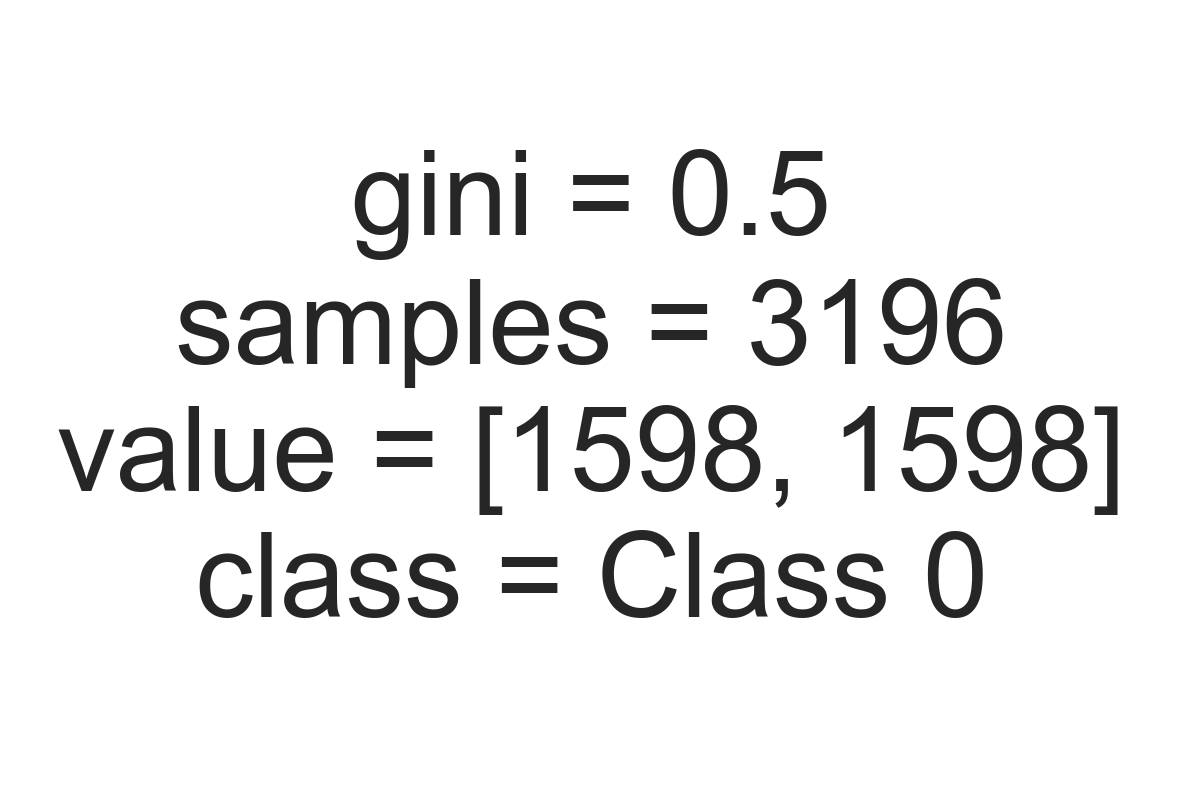

In [56]:
trained_DT = best_DT

plt.figure(figsize=(15, 10))
plot_tree(trained_DT, filled=True, feature_names=X_train_resampled.columns, class_names=['Class 0', 'Class 1'])

plt.show()

In [57]:
XGB_model = XGBClassifier()

param_dist = {
    "learning_rate": [0.05, 0.10, 0.15, 0.20, 0.25, 0.30],
    "max_depth": [3, 4, 5, 6, 8, 10, 12, 15],
    "min_child_weight": [1, 3, 5, 7],
    "gamma": [0.0, 0.1, 0.2, 0.3, 0.4],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.7]
}

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

XGB = RandomizedSearchCV(XGB_model, param_dist, n_iter=50, scoring="roc_auc", n_jobs=1, cv=cv)
XGB.fit(X_train_resampled, y_train_resampled)

# Predict on the test data
y_pred = XGB.predict(X_test)

#Evaluate results
acc = accuracy_score(y_test, y_pred )
prec = precision_score(y_test, y_pred )
rec = recall_score(y_test, y_pred )
f1 = f1_score(y_test, y_pred )

# Display classification report and accuracy
print(classification_report(y_test, y_pred))
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Get the best estimator from RandomizedSearchCV
best_XGB = XGB.best_estimator_

#Save model performance to model_list
model_list.append(best_XGB.__class__.__name__)
accuracy_list.append(acc)
precision_list.append(prec)
recall_list.append(rec)
f1_score_list.append(f1)



              precision    recall  f1-score   support

         0.0       0.67      0.67      0.67       400
         1.0       0.48      0.48      0.48       256

    accuracy                           0.60       656
   macro avg       0.58      0.58      0.58       656
weighted avg       0.60      0.60      0.60       656

Accuracy: 0.5975609756097561


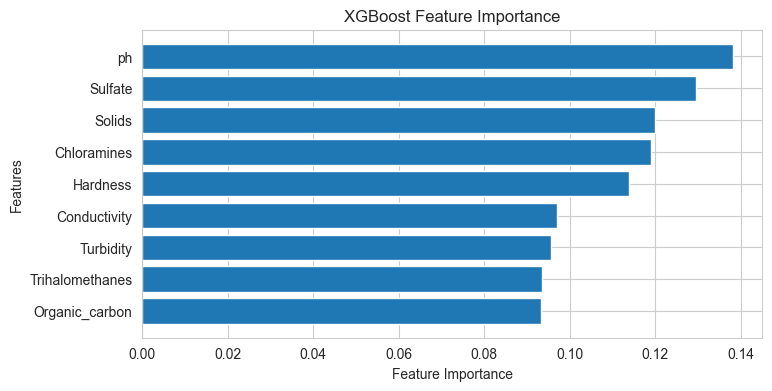

In [58]:
# Access and plot feature importances
xgbf = pd.DataFrame(best_XGB.feature_importances_, index=X_train_resampled.columns).sort_values(by=0)
plt.figure(figsize=(8, 4))
plt.barh(xgbf.index, xgbf.values[:, 0])
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('XGBoost Feature Importance')
plt.show()

In [59]:
data_list = {'Model': model_list,
             'Accuracy': accuracy_list,
             'Precision': precision_list,
             'Recall':recall_list,
             'F1 Score': f1_score_list}
modeldf = pd.DataFrame(data_list)
modeldf.reset_index(drop=True)


,Model,Accuracy,Precision,Recall,F1 Score
0,GaussianNB,0.525915,0.411003,0.496094,0.449558
1,MLPClassifier,0.612805,0.503788,0.519531,0.511538
2,SVC,0.625000,0.517606,0.574219,0.544444
3,RandomForestClassifier,0.641768,0.543568,0.511719,0.527163
4,KNeighborsClassifier,0.599085,0.491349,0.554688,0.521101
5,DecisionTreeClassifier,0.609756,0.000000,0.000000,0.000000
6,XGBClassifier,0.597561,0.484252,0.480469,0.482353


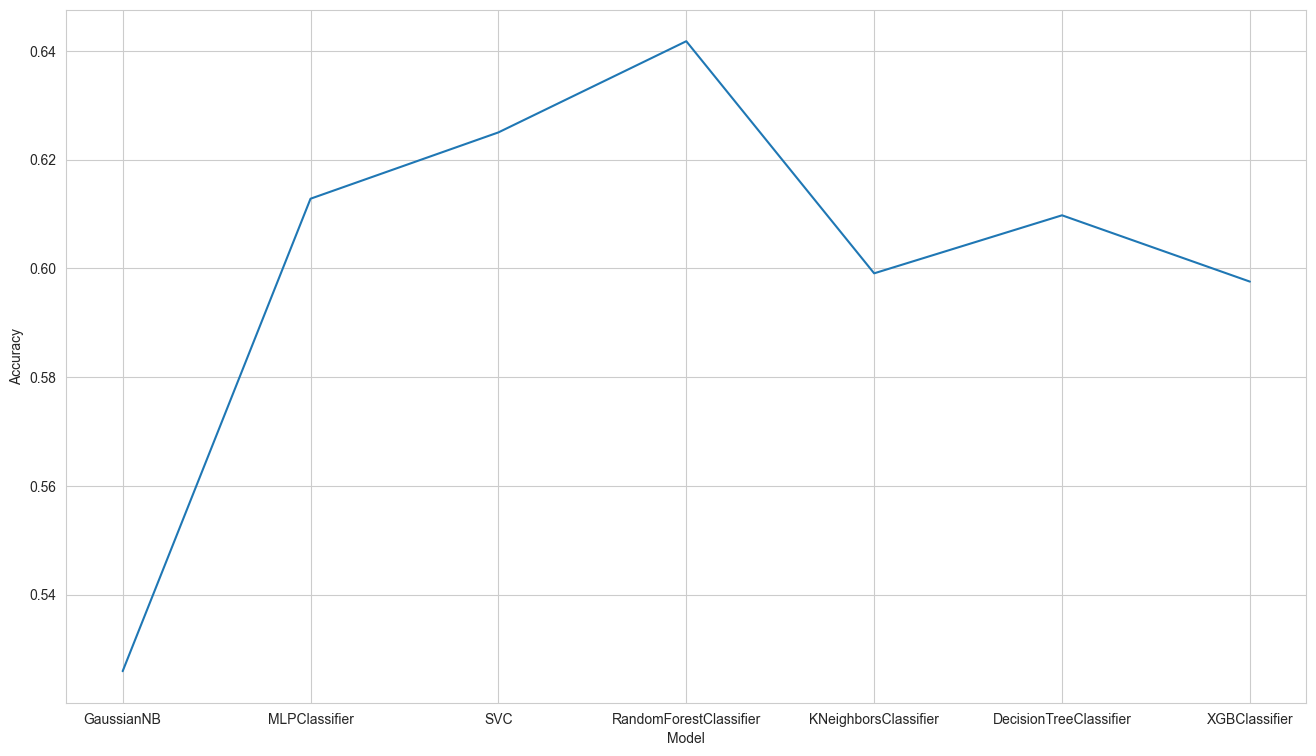

In [60]:
plt.figure(figsize=(16,9))

line = sns.lineplot(data=modeldf, x = "Model", y = 'Accuracy', markers = True)
# line.update_xaxes(title = "Model", rangeslider_visible = False)
# line.update_yaxes(title = "Accuracy")
# line.update_traces(line_color="skyblue")
# line.update_layout(showlegend=True,
#                    title = {
#                        'text': 'Accuracy vs Model',
#                        'y': 0.94,
#                        'x': 0.5,
#                        'xanchor': 'center',
#                        'yanchor': 'top'
#                    })
plt.show()

First Result:

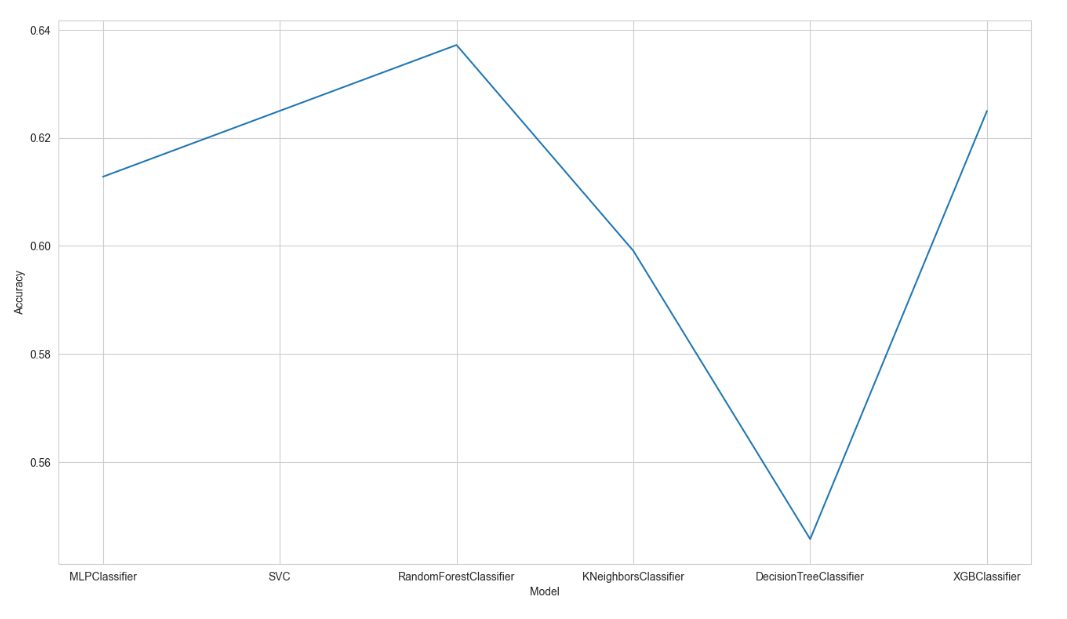

In [61]:
# Let us define functions to summarise the Prediction's scores

#Visualising Function
def AUC_ROC_plot(Test_Y, pred):
    ref = [0 for _ in range(len(Test_Y))]
    ref_auc = roc_auc_score(Test_Y, ref)
    lr_auc = roc_auc_score(Test_Y, pred)

    ns_fpr, ns_tpr, _ = roc_curve(Test_Y, ref)
    lr_fpr, lr_tpr, _ = roc_curve(Test_Y, pred)

    plt.plot(ns_fpr, ns_tpr, linestyle='--')
    plt.plot(lr_fpr, lr_tpr, marker='.', label='AUC = {}'.format(round(roc_auc_score(Test_Y, pred)*100,2)))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()

In [62]:
#Plotting Confusion-Matrix of all the predictive Models

def plot_cm(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_true))
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = ''
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_true))
    cm.columns=labels
    cm.index=labels
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    #fig, ax = plt.subplots()
    sns.heatmap(cm, annot=annot, fmt='')# cmap= "GnBu"

def conf_mat_plot(modeldf):
    plt.figure(figsize=[20,3.5*math.ceil(len(modeldf)*len(labels)/14)])

    for i in range(len(modeldf)):
        if len(labels)<=4:
            plt.subplot(2,4,i+1)
        else:
            plt.subplot(math.ceil(len(modeldf)/3),3,i+1)
        pred = modeldf[i].predict(Test_X_std)
        #plot_cm(Test_Y, pred)
        sns.heatmap(confusion_matrix(Test_Y, pred), annot=True, cmap='Blues', fmt='.0f') #vmin=0,vmax=5
        plt.title(modeldf.index[i])
    plt.tight_layout()
    plt.show()

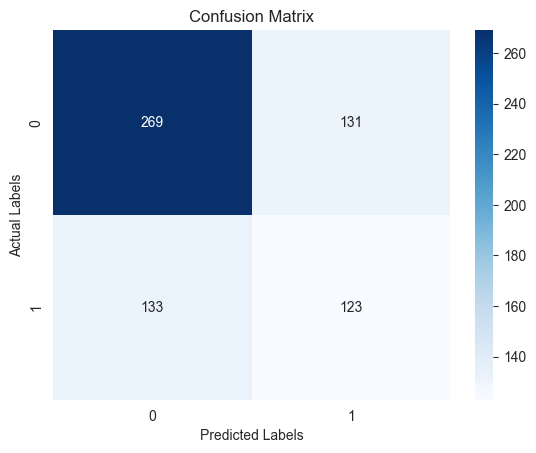

In [63]:
# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure()
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("Actual Labels")
plt.show()

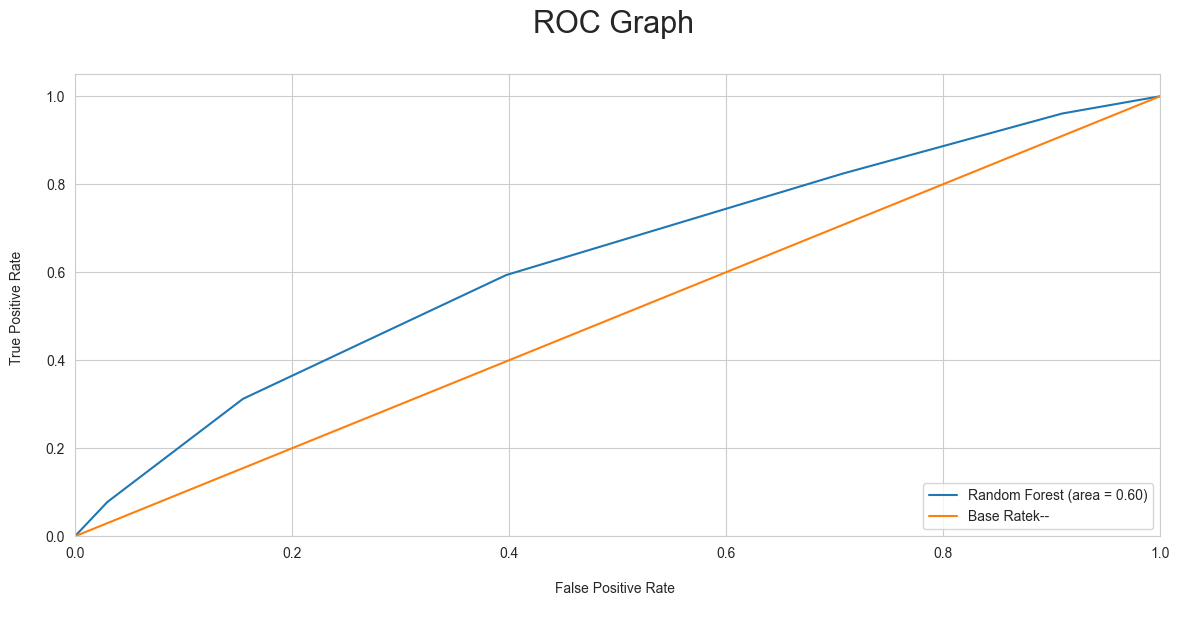

In [64]:
# The highest accuracry is  Random Forest model with value of 64, the Evaluate the model using ROC Graph

classifier.fit(X_train_resampled, y_train_resampled)
probs = classifier.predict_proba(X_test)
probs = probs[:, 1]
classifier_roc_auc = accuracy_score(y_test, y_pred )


rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, classifier.predict_proba(X_test)[:,1])
plt.figure(figsize=(14, 6))

# Plot Random Forest ROC
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % classifier_roc_auc)
# Plot Base Rate ROC
plt.plot([0,1], [0,1],label='Base Rate' 'k--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])



plt.ylabel('True Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.xlabel('\nFalse Positive Rate \n',horizontalalignment="center",fontstyle = "normal", fontsize = "medium", fontfamily = "sans-serif")
plt.title('ROC Graph \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.legend(loc="lower right", fontsize = "medium")
plt.xticks(rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")



plt.show()